In [90]:
# All Imports
import sys 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import collections
#from sklearn.neighbors import NearestNeighbors
#from gensim.test.utils import common_texts
import pickle

from gensim.models.doc2vec import Doc2Vec, TaggedDocument,KeyedVectors 
from gensim.test.utils import get_tmpfile
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

from sklearn.cluster import KMeans

In [5]:
test_documents_json = pickle.load( open( "counted_bows_test", "rb" ) ) #test_documents
print(len(test_documents_json))
train_documents_json = pickle.load( open( "counted_bows", "rb" ) ) #train_documents
print(len(train_documents_json))

10969
123984


In [ ]:
train_documents = [TaggedDocument(i[0],i[1]) for i in train_documents_json]
test_documents = [TaggedDocument(i[0],i[1]) for i in test_documents_json]
print(train_documents[123])

In [3]:
nltk.download(["stopwords", "averaged_perceptron_tagger", "vader_lexicon"])

[nltk_data] Downloading package stopwords to /home/lilli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lilli/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lilli/nltk_data...


True

In [51]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append(nltk.corpus.stopwords.words("spanish"))
stopwords.append(nltk.corpus.stopwords.words("german"))
stopwords.append(nltk.corpus.stopwords.words("dutch"))
stopwords.append(nltk.corpus.stopwords.words("french"))
stopwords.append(nltk.corpus.stopwords.words("italian"))
def remove_stopwords(doc_corpus):
    new_corp = []
    for doc in doc_corpus:
        words = [w for w in doc[0] if w.lower() not in stopwords]
        if len(words) == 0:
            print("removed")
        else:
            new_corp.append([words,doc[1]])
    return new_corp

docs = remove_stopwords(train_documents_json)

In [106]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
all_words = [item for sublist in docs for item in sublist[0]]

frequency_distribution = nltk.FreqDist(all_words)
print(frequency_distribution.most_common(5))

In [148]:
def add_freq_dist(doc_corpus):
    tfidf_dict = {} 
    for doc in doc_corpus:
        freq_dist_doc = nltk.FreqDist(doc[0])
        tfidf = [[w, freq_dist_doc[w]/frequency_distribution[w] ] for w in list(set(doc[0]))]
        tfidf_dict[doc[1][0]] = tfidf
    return tfidf_dict
with_tfidf = add_freq_dist(docs)  


In [35]:
corpus = [' '.join(x[0]) for x in docs]
vectorizer = TfidfVectorizer()
tfidf_x = vectorizer.fit_transform(corpus)

In [40]:
df_countvect = pd.DataFrame(data= tfidf_x.toarray(), index=[i[1][0] for i in docs], columns=vectorizer.get_feature_names() )

In [52]:
docs[0]

[['stop',
  'want',
  'truth',
  'come',
  'around',
  'truth',
  'whi',
  'truth',
  'well',
  'roll',
  'roll',
  'truth',
  'tell',
  'truth',
  'love',
  'day',
  'around',
  'tell',
  'stop',
  'last',
  'truth',
  'tell',
  'truth',
  'start',
  'tell',
  'tell',
  'tell',
  'truth',
  'lie',
  'truth',
  'come',
  'everi',
  'want',
  'tell',
  'truth',
  'well',
  'would',
  'everi',
  'truth',
  'tell',
  'tell',
  'hold',
  'tell',
  'good',
  'tell',
  'feel',
  'oh',
  'babi',
  'tell',
  'feel',
  'truth',
  'tell',
  'goin',
  'tell',
  'night',
  'fall',
  'tight',
  'tell',
  'truth',
  'tell',
  'girl',
  'tell',
  'would',
  'truth',
  'lie',
  'make',
  'tell',
  'day',
  'truth',
  'sure',
  'tell',
  'truth',
  'tell',
  'would',
  'hey',
  'tell',
  'stop',
  'tell',
  'truth',
  'made',
  'babi',
  'tell',
  'babi',
  'day',
  'thought',
  'truth',
  'hey',
  'man',
  'sure',
  'whi',
  'truth',
  'life',
  'well',
  'could',
  'littl',
  'bridg',
  'done',
  'ev

In [94]:
train_documents = [TaggedDocument(i[0],[i[1][0]]) for i in docs]
modeld2v = Doc2Vec(documents=train_documents, vector_size=10, epochs=3, min_count=2, workers=6)
modeld2v.save("stopwords_removed.model")

In [95]:
modeld2v.train(train_documents, total_examples=modeld2v.corpus_count, epochs=100)
modeld2v.save("stopwords_removed.model")

In [96]:
inferred_vectors = [modeld2v.dv[i] for i in range(len(docs))]
X = np.array(inferred_vectors)
print(len(X))

123984


In [169]:
inferred_vectors_dict = {docs[i][1][0]: modeld2v.dv[i] for i in range(len(docs))}
with open("inferred_vectors_dict","wb") as inf_json:
    pickle.dump(inferred_vectors_dict,inf_json)
inf_json.close()

In [168]:

def find_closest(document_id):
    vector_doc = inferred_vectors_dict[document_id]
    closest = [float('inf'), '']
    for (k,v) in inferred_vectors_dict.items():
        new_dist = np.linalg.norm(np.array(list(vector_doc))-np.array(list(v)))
        if new_dist != 0 and new_dist < closest[0]:
            closest = [new_dist, k]
    print(with_tfidf[closest[1]])
    print("\n")
    print(with_tfidf[document_id])
    return closest
        
find_closest(docs[50][1][0])

[['made', 5.041847332862761e-05], ['kick', 0.000242306760358614], ['away', 1.6903313049357674e-05], ['play', 5.1371622315832736e-05], ['becom', 0.0008206138191367143], ['yeah', 3.2311743703248944e-05], ['hello', 0.0002938583602703497], ['sat', 0.0008257638315441783], ['give', 2.3919439328342144e-05], ['friend', 4.6311304589450285e-05], ['could', 7.541193770973945e-05], ['like', 4.555684127085364e-05], ['brick', 0.0011248593925759281], ['would', 0.0001234974477194138], ['throw', 0.00019124115509657678], ['stood', 0.00043084877208099956], ['heart', 1.8301610541727672e-05], ['find', 3.087372645878358e-05], ['way', 1.4212822808738043e-05], ['best', 9.275577404693442e-05], ['wood', 0.0007012622720897616], ['brain', 0.0002782415136338342]]


[['taken', 0.00032216494845360824], ['one', 2.1543830924014907e-05], ['never', 2.404915647583661e-05], ['hear', 4.03502400839285e-05], ['might', 8.372404554588077e-05], ['told', 9.030160736861116e-05], ['terribl', 0.0015723270440251573], ['start', 5.3228

[1.6939181, '2335879']

In [128]:
sia_scores = pickle.load( open( "sia_scores", "rb" ) ) #test_documents
X = np.array([list(sia_scores[i].values()) for i in sia_scores.keys()])

In [150]:
def find_closest(document_id):
    np_scores = {k: v.values() for (k,v) in sia_scores.items()}
    sia_score_doc = np_scores[document_id]
    closest = [float('inf'), '']
    for (k,v) in np_scores.items():
        new_dist = np.linalg.norm(np.array(list(sia_score_doc))-np.array(list(v)))
        if new_dist != 0 and new_dist < closest[0]:
            closest = [new_dist, k]
    print(with_tfidf[closest[1]])
    print("\n")
    print(with_tfidf[document_id])
    return closest
        
find_closest(docs[0][1][0])

[['light', 3.1179845347967076e-05], ['beat', 0.00010119409026512852], ['night', 9.812002040896425e-05], ['pull', 0.00014259232853272493], ['day', 1.605858170606372e-05], ['sweet', 6.93000693000693e-05], ['wonder', 7.880841673890771e-05], ['play', 5.1371622315832736e-05], ['music', 0.00011010790574763268], ['thought', 5.2659294365455505e-05], ['babi', 0.00031673133264708213], ['new', 4.7212124073462063e-05], ['today', 8.795074758135444e-05], ['whole', 0.00013970382788488405], ['close', 6.78195998643608e-05], ['start', 5.3228296162239846e-05], ['lie', 3.9215686274509805e-05], ['honey', 0.0001733102253032929], ['late', 0.00043001505052676843], ['like', 9.11136825417073e-06], ['tonight', 4.6505138817839374e-05], ['love', 5.875544222283589e-06], ['lone', 9.722897423432182e-05], ['world', 2.1462451441203615e-05], ['dream', 0.00022490863086870958], ['alon', 4.283939510774108e-05], ['heart', 1.8301610541727672e-05], ['sleep', 7.374631268436578e-05], ['feel', 2.7515236562246344e-05], ['til', 0.

[0.0024166091947188965, '6829927']

In [137]:
kmeans_model = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans_model.fit(X)
clustering  = kmeans_model.labels_

#X_embedded = TSNE(n_components=2, perplexity=20).fit_transform(X)
X_embedded.shape

(123984, 2)

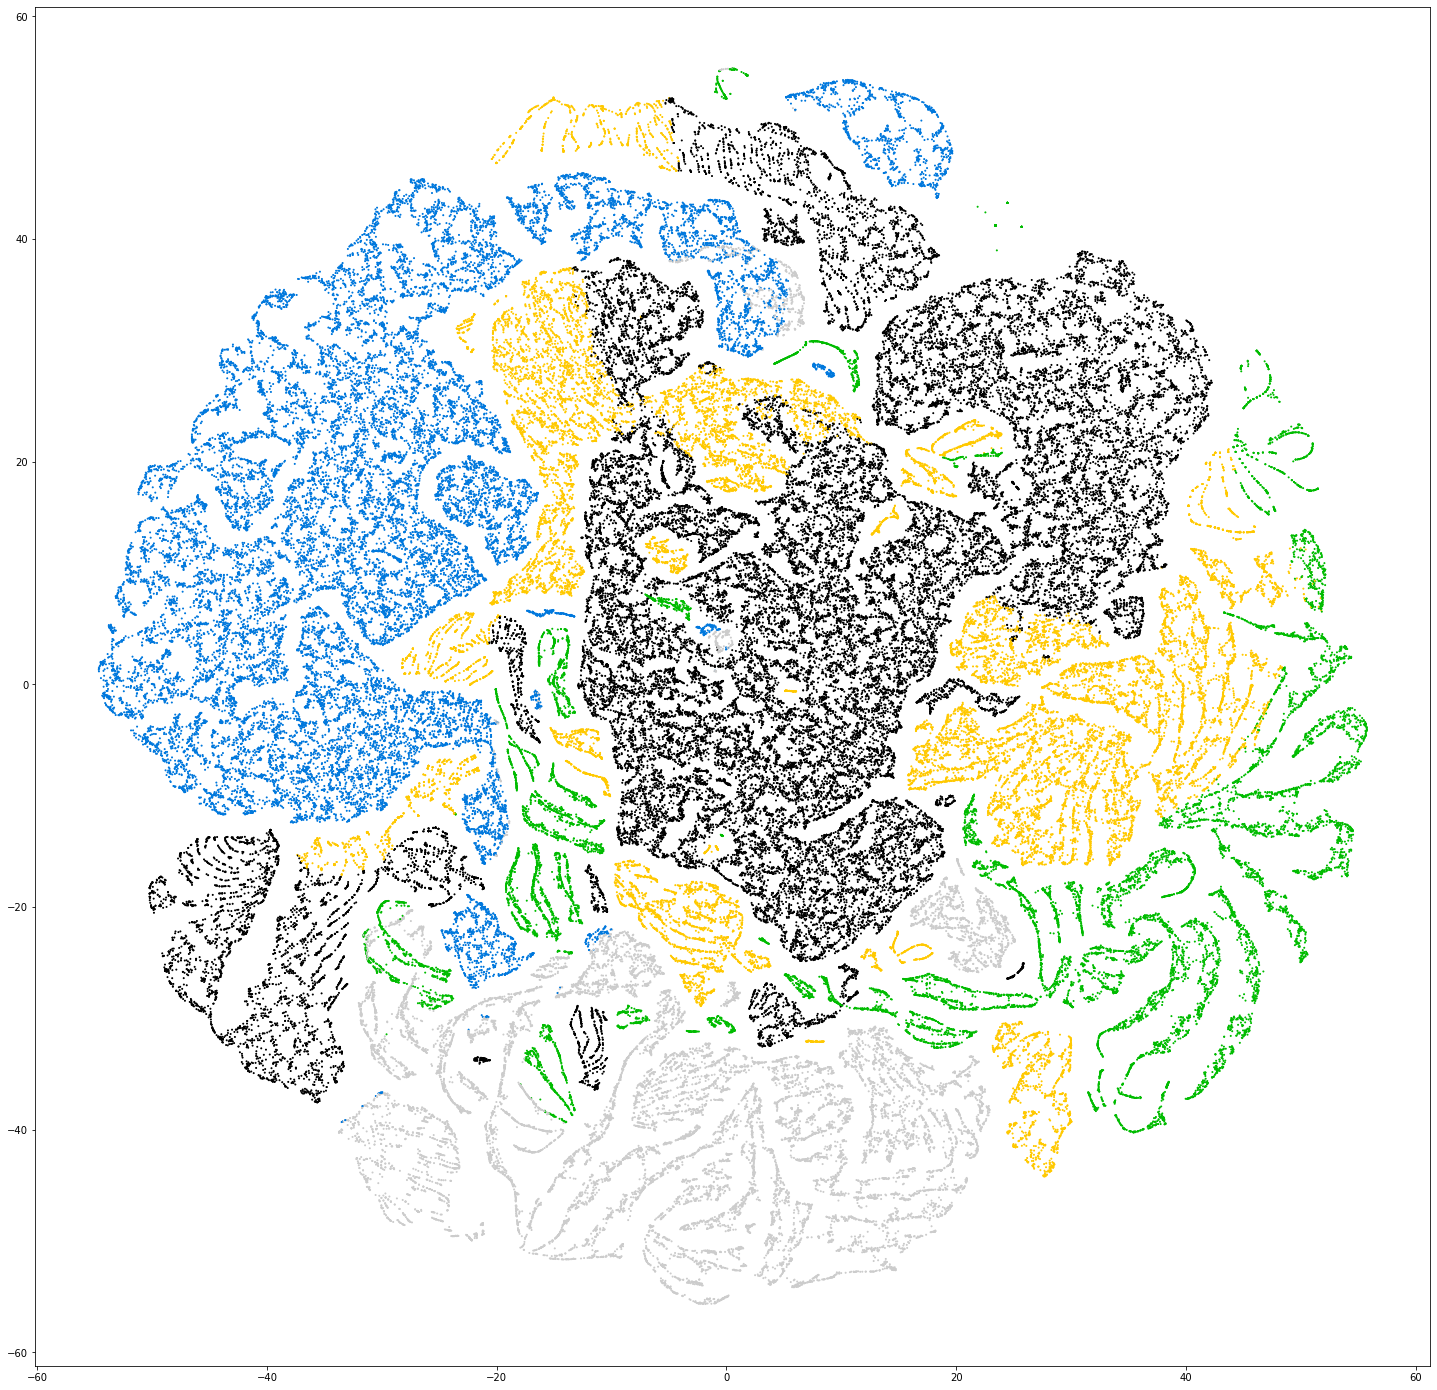

In [138]:
plt.figure(figsize=(25, 25))

plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded],c=clustering,cmap='nipy_spectral', s=1)

In [118]:
def most_similar_track(index):
    inferred_vector = modeld2v.dv[index]  
    #inferred_vector = modeld2v.infer_vector(docs[index][0])
    sims = modeld2v.dv.most_similar([inferred_vector])
    print(sims)
    print(' '.join(set(docs[index][0])))

In [121]:
def sentiment_analyzer(documents):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = {}
    for doc in documents:
        polarity_scores[doc[1][0]] = sia.polarity_scores(' '.join(set(doc[0])))
    return polarity_scores

In [122]:
polarity_scores = sentiment_analyzer(docs)

In [123]:
with open("sia_scores","wb") as test_json:
    pickle.dump(polarity_scores,test_json)
test_json.close()

In [124]:
polarity_scores[docs[0][1][0]]

{'neg': 0.046, 'neu': 0.642, 'pos': 0.313, 'compound': 0.8979}